In [ ]:
# breast_cancer  :  Deep Learning 이진분류 
## 1. Best Model save
## 2. Early stopping
## 3. Graph
# load digits : 다중분류
## 1. random 2020
## 2. train/test = 8:2
## 3. validation = 0.2

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf

from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# seed 값 설정
seed = 2020
np.random.seed(seed)
tf.random.set_seed(seed)

## breast_cancer

In [1]:
from sklearn.datasets import load_breast_cancer, load_digits

In [51]:
# 데이터 
df1 = load_breast_cancer()
df1.data

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [52]:
df1.data.shape

(569, 30)

In [53]:
X = df1.data
Y = df1.target

In [54]:
# 모델 설정
model = Sequential([
    Dense(50, input_dim=30, activation='relu'),
    Dense(30, activation='relu'),
    Dense(18, activation='relu'),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
]) 
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 50)                1550      
_________________________________________________________________
dense_14 (Dense)             (None, 30)                1530      
_________________________________________________________________
dense_15 (Dense)             (None, 18)                558       
_________________________________________________________________
dense_16 (Dense)             (None, 8)                 152       
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 9         
Total params: 3,799
Trainable params: 3,799
Non-trainable params: 0
_________________________________________________________________


In [55]:
# 모델 컴파일 
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [56]:
# 모델 컴파일 
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [57]:
# 모델 저장 폴더 설정
import os
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

In [58]:
# 모델 저장 조건 설정
modelpath = MODEL_DIR + "final{epoch:03d}-{val_loss:.4f}.hdf5"

checkpointer_callback = ModelCheckpoint(filepath=modelpath, monitor='val_loss', 
                               verbose=1, save_best_only=True)

In [59]:
# 자동 중단 설정
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=100)

In [60]:
# 모델 실행 및 저장
history = model.fit(X, Y, validation_split=0.33, epochs=3500, batch_size=500,
                    verbose=0, callbacks=[early_stopping_callback, checkpointer_callback])


Epoch 00001: val_loss improved from inf to 26.76708, saving model to ./model/final001-26.7671.hdf5

Epoch 00002: val_loss improved from 26.76708 to 21.85481, saving model to ./model/final002-21.8548.hdf5

Epoch 00003: val_loss improved from 21.85481 to 17.79015, saving model to ./model/final003-17.7901.hdf5

Epoch 00004: val_loss improved from 17.79015 to 14.83241, saving model to ./model/final004-14.8324.hdf5

Epoch 00005: val_loss improved from 14.83241 to 11.99378, saving model to ./model/final005-11.9938.hdf5

Epoch 00006: val_loss improved from 11.99378 to 9.12671, saving model to ./model/final006-9.1267.hdf5

Epoch 00007: val_loss improved from 9.12671 to 6.18571, saving model to ./model/final007-6.1857.hdf5

Epoch 00008: val_loss improved from 6.18571 to 3.37446, saving model to ./model/final008-3.3745.hdf5

Epoch 00009: val_loss improved from 3.37446 to 1.56977, saving model to ./model/final009-1.5698.hdf5

Epoch 00010: val_loss improved from 1.56977 to 1.18776, saving model t


Epoch 00135: val_loss improved from 0.71417 to 0.71210, saving model to ./model/final135-0.7121.hdf5

Epoch 00136: val_loss improved from 0.71210 to 0.70990, saving model to ./model/final136-0.7099.hdf5

Epoch 00137: val_loss improved from 0.70990 to 0.70755, saving model to ./model/final137-0.7076.hdf5

Epoch 00138: val_loss improved from 0.70755 to 0.70506, saving model to ./model/final138-0.7051.hdf5

Epoch 00139: val_loss improved from 0.70506 to 0.70236, saving model to ./model/final139-0.7024.hdf5

Epoch 00140: val_loss improved from 0.70236 to 0.69944, saving model to ./model/final140-0.6994.hdf5

Epoch 00141: val_loss improved from 0.69944 to 0.69639, saving model to ./model/final141-0.6964.hdf5

Epoch 00142: val_loss improved from 0.69639 to 0.69318, saving model to ./model/final142-0.6932.hdf5

Epoch 00143: val_loss improved from 0.69318 to 0.68991, saving model to ./model/final143-0.6899.hdf5

Epoch 00144: val_loss improved from 0.68991 to 0.68654, saving model to ./model/f


Epoch 00232: val_loss improved from 0.56270 to 0.56188, saving model to ./model/final232-0.5619.hdf5

Epoch 00233: val_loss improved from 0.56188 to 0.56117, saving model to ./model/final233-0.5612.hdf5

Epoch 00234: val_loss improved from 0.56117 to 0.56058, saving model to ./model/final234-0.5606.hdf5

Epoch 00235: val_loss improved from 0.56058 to 0.56006, saving model to ./model/final235-0.5601.hdf5

Epoch 00236: val_loss improved from 0.56006 to 0.55957, saving model to ./model/final236-0.5596.hdf5

Epoch 00237: val_loss improved from 0.55957 to 0.55946, saving model to ./model/final237-0.5595.hdf5

Epoch 00238: val_loss did not improve from 0.55946

Epoch 00239: val_loss improved from 0.55946 to 0.55918, saving model to ./model/final239-0.5592.hdf5

Epoch 00240: val_loss improved from 0.55918 to 0.55835, saving model to ./model/final240-0.5583.hdf5

Epoch 00241: val_loss improved from 0.55835 to 0.55755, saving model to ./model/final241-0.5575.hdf5

Epoch 00242: val_loss improve


Epoch 00323: val_loss improved from 0.52527 to 0.52489, saving model to ./model/final323-0.5249.hdf5

Epoch 00324: val_loss improved from 0.52489 to 0.52447, saving model to ./model/final324-0.5245.hdf5

Epoch 00325: val_loss improved from 0.52447 to 0.52428, saving model to ./model/final325-0.5243.hdf5

Epoch 00326: val_loss improved from 0.52428 to 0.52398, saving model to ./model/final326-0.5240.hdf5

Epoch 00327: val_loss improved from 0.52398 to 0.52355, saving model to ./model/final327-0.5235.hdf5

Epoch 00328: val_loss improved from 0.52355 to 0.52302, saving model to ./model/final328-0.5230.hdf5

Epoch 00329: val_loss improved from 0.52302 to 0.52246, saving model to ./model/final329-0.5225.hdf5

Epoch 00330: val_loss improved from 0.52246 to 0.52195, saving model to ./model/final330-0.5220.hdf5

Epoch 00331: val_loss improved from 0.52195 to 0.52153, saving model to ./model/final331-0.5215.hdf5

Epoch 00332: val_loss improved from 0.52153 to 0.52134, saving model to ./model/f


Epoch 00425: val_loss improved from 0.49298 to 0.49229, saving model to ./model/final425-0.4923.hdf5

Epoch 00426: val_loss improved from 0.49229 to 0.49205, saving model to ./model/final426-0.4920.hdf5

Epoch 00427: val_loss improved from 0.49205 to 0.49202, saving model to ./model/final427-0.4920.hdf5

Epoch 00428: val_loss did not improve from 0.49202

Epoch 00429: val_loss improved from 0.49202 to 0.49143, saving model to ./model/final429-0.4914.hdf5

Epoch 00430: val_loss improved from 0.49143 to 0.49095, saving model to ./model/final430-0.4910.hdf5

Epoch 00431: val_loss improved from 0.49095 to 0.49070, saving model to ./model/final431-0.4907.hdf5

Epoch 00432: val_loss improved from 0.49070 to 0.49064, saving model to ./model/final432-0.4906.hdf5

Epoch 00433: val_loss did not improve from 0.49064

Epoch 00434: val_loss improved from 0.49064 to 0.49017, saving model to ./model/final434-0.4902.hdf5

Epoch 00435: val_loss improved from 0.49017 to 0.48975, saving model to ./model


Epoch 00527: val_loss did not improve from 0.46603

Epoch 00528: val_loss did not improve from 0.46603

Epoch 00529: val_loss improved from 0.46603 to 0.46534, saving model to ./model/final529-0.4653.hdf5

Epoch 00530: val_loss improved from 0.46534 to 0.46518, saving model to ./model/final530-0.4652.hdf5

Epoch 00531: val_loss did not improve from 0.46518

Epoch 00532: val_loss did not improve from 0.46518

Epoch 00533: val_loss improved from 0.46518 to 0.46428, saving model to ./model/final533-0.4643.hdf5

Epoch 00534: val_loss improved from 0.46428 to 0.46420, saving model to ./model/final534-0.4642.hdf5

Epoch 00535: val_loss did not improve from 0.46420

Epoch 00536: val_loss improved from 0.46420 to 0.46412, saving model to ./model/final536-0.4641.hdf5

Epoch 00537: val_loss improved from 0.46412 to 0.46321, saving model to ./model/final537-0.4632.hdf5

Epoch 00538: val_loss did not improve from 0.46321

Epoch 00539: val_loss did not improve from 0.46321

Epoch 00540: val_loss i


Epoch 00664: val_loss did not improve from 0.43511

Epoch 00665: val_loss improved from 0.43511 to 0.43385, saving model to ./model/final665-0.4338.hdf5

Epoch 00666: val_loss did not improve from 0.43385

Epoch 00667: val_loss did not improve from 0.43385

Epoch 00668: val_loss did not improve from 0.43385

Epoch 00669: val_loss did not improve from 0.43385

Epoch 00670: val_loss improved from 0.43385 to 0.43300, saving model to ./model/final670-0.4330.hdf5

Epoch 00671: val_loss did not improve from 0.43300

Epoch 00672: val_loss did not improve from 0.43300

Epoch 00673: val_loss improved from 0.43300 to 0.43231, saving model to ./model/final673-0.4323.hdf5

Epoch 00674: val_loss improved from 0.43231 to 0.43150, saving model to ./model/final674-0.4315.hdf5

Epoch 00675: val_loss did not improve from 0.43150

Epoch 00676: val_loss did not improve from 0.43150

Epoch 00677: val_loss did not improve from 0.43150

Epoch 00678: val_loss improved from 0.43150 to 0.42995, saving model to


Epoch 00813: val_loss did not improve from 0.40120

Epoch 00814: val_loss did not improve from 0.40120

Epoch 00815: val_loss did not improve from 0.40120

Epoch 00816: val_loss did not improve from 0.40120

Epoch 00817: val_loss did not improve from 0.40120

Epoch 00818: val_loss did not improve from 0.40120

Epoch 00819: val_loss did not improve from 0.40120

Epoch 00820: val_loss did not improve from 0.40120

Epoch 00821: val_loss did not improve from 0.40120

Epoch 00822: val_loss did not improve from 0.40120

Epoch 00823: val_loss did not improve from 0.40120

Epoch 00824: val_loss did not improve from 0.40120

Epoch 00825: val_loss did not improve from 0.40120

Epoch 00826: val_loss improved from 0.40120 to 0.40053, saving model to ./model/final826-0.4005.hdf5

Epoch 00827: val_loss did not improve from 0.40053

Epoch 00828: val_loss did not improve from 0.40053

Epoch 00829: val_loss improved from 0.40053 to 0.39918, saving model to ./model/final829-0.3992.hdf5

Epoch 00830: va


Epoch 00964: val_loss did not improve from 0.37141

Epoch 00965: val_loss did not improve from 0.37141

Epoch 00966: val_loss did not improve from 0.37141

Epoch 00967: val_loss did not improve from 0.37141

Epoch 00968: val_loss did not improve from 0.37141

Epoch 00969: val_loss did not improve from 0.37141

Epoch 00970: val_loss did not improve from 0.37141

Epoch 00971: val_loss did not improve from 0.37141

Epoch 00972: val_loss did not improve from 0.37141

Epoch 00973: val_loss did not improve from 0.37141

Epoch 00974: val_loss did not improve from 0.37141

Epoch 00975: val_loss did not improve from 0.37141

Epoch 00976: val_loss did not improve from 0.37141

Epoch 00977: val_loss did not improve from 0.37141

Epoch 00978: val_loss did not improve from 0.37141

Epoch 00979: val_loss did not improve from 0.37141

Epoch 00980: val_loss did not improve from 0.37141

Epoch 00981: val_loss did not improve from 0.37141

Epoch 00982: val_loss did not improve from 0.37141

Epoch 00983


Epoch 01126: val_loss did not improve from 0.33991

Epoch 01127: val_loss improved from 0.33991 to 0.33720, saving model to ./model/final1127-0.3372.hdf5

Epoch 01128: val_loss did not improve from 0.33720

Epoch 01129: val_loss did not improve from 0.33720

Epoch 01130: val_loss did not improve from 0.33720

Epoch 01131: val_loss did not improve from 0.33720

Epoch 01132: val_loss did not improve from 0.33720

Epoch 01133: val_loss did not improve from 0.33720

Epoch 01134: val_loss did not improve from 0.33720

Epoch 01135: val_loss did not improve from 0.33720

Epoch 01136: val_loss did not improve from 0.33720

Epoch 01137: val_loss did not improve from 0.33720

Epoch 01138: val_loss did not improve from 0.33720

Epoch 01139: val_loss did not improve from 0.33720

Epoch 01140: val_loss did not improve from 0.33720

Epoch 01141: val_loss did not improve from 0.33720

Epoch 01142: val_loss did not improve from 0.33720

Epoch 01143: val_loss did not improve from 0.33720

Epoch 01144:


Epoch 01277: val_loss did not improve from 0.29956

Epoch 01278: val_loss did not improve from 0.29956

Epoch 01279: val_loss did not improve from 0.29956

Epoch 01280: val_loss did not improve from 0.29956

Epoch 01281: val_loss did not improve from 0.29956

Epoch 01282: val_loss did not improve from 0.29956

Epoch 01283: val_loss did not improve from 0.29956

Epoch 01284: val_loss did not improve from 0.29956

Epoch 01285: val_loss did not improve from 0.29956

Epoch 01286: val_loss did not improve from 0.29956

Epoch 01287: val_loss did not improve from 0.29956

Epoch 01288: val_loss did not improve from 0.29956

Epoch 01289: val_loss did not improve from 0.29956

Epoch 01290: val_loss did not improve from 0.29956

Epoch 01291: val_loss did not improve from 0.29956

Epoch 01292: val_loss did not improve from 0.29956

Epoch 01293: val_loss did not improve from 0.29956

Epoch 01294: val_loss did not improve from 0.29956

Epoch 01295: val_loss did not improve from 0.29956

Epoch 01296


Epoch 01450: val_loss did not improve from 0.27314

Epoch 01451: val_loss did not improve from 0.27314

Epoch 01452: val_loss did not improve from 0.27314

Epoch 01453: val_loss did not improve from 0.27314

Epoch 01454: val_loss did not improve from 0.27314

Epoch 01455: val_loss improved from 0.27314 to 0.26377, saving model to ./model/final1455-0.2638.hdf5

Epoch 01456: val_loss did not improve from 0.26377

Epoch 01457: val_loss did not improve from 0.26377

Epoch 01458: val_loss did not improve from 0.26377

Epoch 01459: val_loss did not improve from 0.26377

Epoch 01460: val_loss did not improve from 0.26377

Epoch 01461: val_loss did not improve from 0.26377

Epoch 01462: val_loss did not improve from 0.26377

Epoch 01463: val_loss did not improve from 0.26377

Epoch 01464: val_loss did not improve from 0.26377

Epoch 01465: val_loss did not improve from 0.26377

Epoch 01466: val_loss did not improve from 0.26377

Epoch 01467: val_loss did not improve from 0.26377

Epoch 01468:


Epoch 01615: val_loss did not improve from 0.25310

Epoch 01616: val_loss did not improve from 0.25310

Epoch 01617: val_loss did not improve from 0.25310

Epoch 01618: val_loss did not improve from 0.25310

Epoch 01619: val_loss did not improve from 0.25310

Epoch 01620: val_loss improved from 0.25310 to 0.25220, saving model to ./model/final1620-0.2522.hdf5

Epoch 01621: val_loss did not improve from 0.25220

Epoch 01622: val_loss did not improve from 0.25220

Epoch 01623: val_loss did not improve from 0.25220

Epoch 01624: val_loss did not improve from 0.25220

Epoch 01625: val_loss did not improve from 0.25220

Epoch 01626: val_loss did not improve from 0.25220

Epoch 01627: val_loss did not improve from 0.25220

Epoch 01628: val_loss did not improve from 0.25220

Epoch 01629: val_loss did not improve from 0.25220

Epoch 01630: val_loss did not improve from 0.25220

Epoch 01631: val_loss did not improve from 0.25220

Epoch 01632: val_loss did not improve from 0.25220

Epoch 01633:


Epoch 01783: val_loss did not improve from 0.22075

Epoch 01784: val_loss did not improve from 0.22075

Epoch 01785: val_loss did not improve from 0.22075

Epoch 01786: val_loss did not improve from 0.22075

Epoch 01787: val_loss did not improve from 0.22075

Epoch 01788: val_loss did not improve from 0.22075

Epoch 01789: val_loss did not improve from 0.22075

Epoch 01790: val_loss did not improve from 0.22075

Epoch 01791: val_loss did not improve from 0.22075

Epoch 01792: val_loss did not improve from 0.22075

Epoch 01793: val_loss did not improve from 0.22075

Epoch 01794: val_loss improved from 0.22075 to 0.22070, saving model to ./model/final1794-0.2207.hdf5

Epoch 01795: val_loss did not improve from 0.22070

Epoch 01796: val_loss did not improve from 0.22070

Epoch 01797: val_loss did not improve from 0.22070

Epoch 01798: val_loss did not improve from 0.22070

Epoch 01799: val_loss did not improve from 0.22070

Epoch 01800: val_loss improved from 0.22070 to 0.21972, saving m

In [61]:
del model

In [62]:
model = load_model('model/final1604-0.0850.hdf5')
print("\n Accuracy: %.4f" % (model.evaluate(X, Y, verbose=2)[1]))

569/569 - 0s - loss: 0.0777 - accuracy: 0.9701

 Accuracy: 0.9701


In [63]:
# y_vloss에 테스트셋으로 실험 결과의 오차 값을 저장
y_vloss=history.history['val_loss']

In [64]:
# y_acc에 학습셋으로 측정한 정확도의 값을 저장
y_acc=history.history['accuracy']

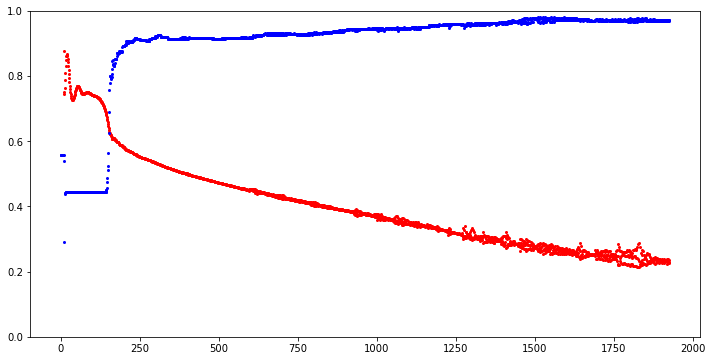

In [65]:
# x 값을 지정하고 정확도를 파란색으로, 오차를 빨간색으로 표시
x_len = np.arange(len(y_acc))
plt.figure(figsize=(12,6))
plt.ylim(0,1)
plt.plot(x_len, y_vloss, "o", c="red", markersize=2)
plt.plot(x_len, y_acc, "o", c="blue", markersize=2)

plt.show()

## load digits

In [76]:
# 데이터 
df2 = load_digits()
df2['data']

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [79]:
df2['data'].shape

(1797, 64)

In [80]:
df2['target_names']

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [82]:
df2['images'][0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [83]:
df2['target']

array([0, 1, 2, ..., 8, 9, 8])

In [89]:
df2.target

array([0, 1, 2, ..., 8, 9, 8])

In [146]:
X = df2.data
Y = df2.target

In [147]:
from sklearn.preprocessing import LabelEncoder

e = LabelEncoder()
e.fit(Y)
Y = e.transform(Y)

In [148]:
Y

array([0, 1, 2, ..., 8, 9, 8], dtype=int64)

In [149]:
# One hot encoding
Y_encoded = tf.keras.utils.to_categorical(Y)
Y_encoded

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [150]:
from sklearn.model_selection import train_test_split

In [152]:
# 학습셋과 테스트셋의 구분
X_train, X_test, y_train, y_test = train_test_split(X, Y_encoded, test_size=0.2, stratify=Y, random_state=seed)

In [155]:
# 모델 설정
model = Sequential([
    Dense(80, input_dim=64, activation='relu'),
    Dense(50, activation='relu'),
    Dense(28, activation='relu'),
    Dense(12, activation='relu'),
    Dense(10, activation='softmax')
]) 
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_33 (Dense)             (None, 80)                5200      
_________________________________________________________________
dense_34 (Dense)             (None, 50)                4050      
_________________________________________________________________
dense_35 (Dense)             (None, 28)                1428      
_________________________________________________________________
dense_36 (Dense)             (None, 12)                348       
_________________________________________________________________
dense_37 (Dense)             (None, 10)                130       
Total params: 11,156
Trainable params: 11,156
Non-trainable params: 0
_________________________________________________________________


In [156]:
# 모델 컴파일 
## 다중분류
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [157]:
# 모델 저장 폴더 설정
import os
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

In [158]:
# 모델 저장 조건 설정
modelpath = MODEL_DIR + "final{epoch:03d}-{val_loss:.4f}.hdf5"

checkpointer_callback = ModelCheckpoint(filepath=modelpath, monitor='val_loss', 
                               verbose=1, save_best_only=True)

In [159]:
# 자동 중단 설정
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=100)

In [169]:
# 모델 실행 및 저장
## epochs : 학습 반복 횟수
## batch_size : 몇 개의 샘플로 가중치를 갱신할 것인지 지정
## val_loss : 매 에포크 마다의 검증 손실값
history = model.fit(X_train, y_train, validation_split=0.2, epochs=5000, batch_size=500,
                    verbose=0, callbacks=[early_stopping_callback, checkpointer_callback])


Epoch 00001: val_loss did not improve from 0.06573

Epoch 00002: val_loss did not improve from 0.06573

Epoch 00003: val_loss did not improve from 0.06573

Epoch 00004: val_loss did not improve from 0.06573

Epoch 00005: val_loss did not improve from 0.06573

Epoch 00006: val_loss did not improve from 0.06573

Epoch 00007: val_loss did not improve from 0.06573

Epoch 00008: val_loss did not improve from 0.06573

Epoch 00009: val_loss did not improve from 0.06573

Epoch 00010: val_loss did not improve from 0.06573

Epoch 00011: val_loss did not improve from 0.06573

Epoch 00012: val_loss did not improve from 0.06573

Epoch 00013: val_loss did not improve from 0.06573

Epoch 00014: val_loss did not improve from 0.06573

Epoch 00015: val_loss did not improve from 0.06573

Epoch 00016: val_loss did not improve from 0.06573

Epoch 00017: val_loss did not improve from 0.06573

Epoch 00018: val_loss did not improve from 0.06573

Epoch 00019: val_loss did not improve from 0.06573

Epoch 00020


Epoch 00160: val_loss did not improve from 0.06544

Epoch 00161: val_loss did not improve from 0.06544

Epoch 00162: val_loss did not improve from 0.06544

Epoch 00163: val_loss did not improve from 0.06544

Epoch 00164: val_loss did not improve from 0.06544

Epoch 00165: val_loss did not improve from 0.06544

Epoch 00166: val_loss did not improve from 0.06544

Epoch 00167: val_loss did not improve from 0.06544

Epoch 00168: val_loss did not improve from 0.06544

Epoch 00169: val_loss did not improve from 0.06544

Epoch 00170: val_loss did not improve from 0.06544

Epoch 00171: val_loss did not improve from 0.06544

Epoch 00172: val_loss did not improve from 0.06544

Epoch 00173: val_loss did not improve from 0.06544

Epoch 00174: val_loss did not improve from 0.06544

Epoch 00175: val_loss did not improve from 0.06544

Epoch 00176: val_loss did not improve from 0.06544

Epoch 00177: val_loss did not improve from 0.06544

Epoch 00178: val_loss did not improve from 0.06544

Epoch 00179


Epoch 00317: val_loss did not improve from 0.06490

Epoch 00318: val_loss did not improve from 0.06490

Epoch 00319: val_loss did not improve from 0.06490

Epoch 00320: val_loss did not improve from 0.06490

Epoch 00321: val_loss did not improve from 0.06490

Epoch 00322: val_loss did not improve from 0.06490

Epoch 00323: val_loss did not improve from 0.06490

Epoch 00324: val_loss did not improve from 0.06490

Epoch 00325: val_loss did not improve from 0.06490

Epoch 00326: val_loss did not improve from 0.06490

Epoch 00327: val_loss did not improve from 0.06490

Epoch 00328: val_loss did not improve from 0.06490

Epoch 00329: val_loss did not improve from 0.06490

Epoch 00330: val_loss did not improve from 0.06490

Epoch 00331: val_loss did not improve from 0.06490

Epoch 00332: val_loss did not improve from 0.06490

Epoch 00333: val_loss did not improve from 0.06490

Epoch 00334: val_loss did not improve from 0.06490

Epoch 00335: val_loss did not improve from 0.06490

Epoch 00336


Epoch 00466: val_loss did not improve from 0.06461

Epoch 00467: val_loss did not improve from 0.06461

Epoch 00468: val_loss did not improve from 0.06461

Epoch 00469: val_loss did not improve from 0.06461

Epoch 00470: val_loss did not improve from 0.06461

Epoch 00471: val_loss did not improve from 0.06461

Epoch 00472: val_loss did not improve from 0.06461

Epoch 00473: val_loss did not improve from 0.06461

Epoch 00474: val_loss did not improve from 0.06461

Epoch 00475: val_loss did not improve from 0.06461

Epoch 00476: val_loss did not improve from 0.06461

Epoch 00477: val_loss did not improve from 0.06461

Epoch 00478: val_loss did not improve from 0.06461

Epoch 00479: val_loss did not improve from 0.06461

Epoch 00480: val_loss did not improve from 0.06461

Epoch 00481: val_loss did not improve from 0.06461


In [170]:
del model

In [171]:
model = load_model('model/final381-0.0646.hdf5')
print("\n Accuracy: %.4f" % (model.evaluate(X_test, y_test, verbose=2)[1]))

360/360 - 0s - loss: 0.2769 - accuracy: 0.9750

 Accuracy: 0.9750
